# Color Extraction

## KMeans

C:\Users\USER\anaconda3\envs\Yolo\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


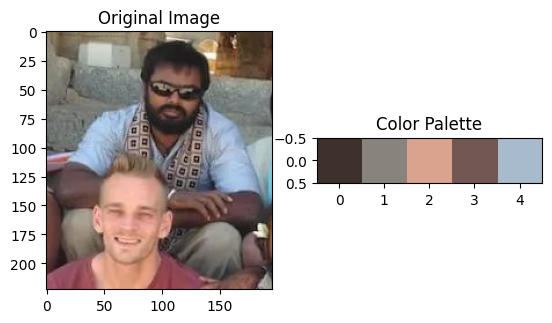

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('person/person/im.jpg34.jpg')
image = image / 255.0
w, h, d = tuple(image.shape)
pixel = np.reshape(image, (w * h, d))

n_colors = 5
model = KMeans(n_clusters=n_colors, random_state=42)
labels = model.fit_predict(pixel)
colors = model.cluster_centers_
colors = (colors * 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

# Plot the color palette
plt.subplot(1, 2, 2)
plt.imshow([colors])
plt.title('Color Palette')

plt.show()

## Pylette

In [2]:
!pip install -q pylette

In [3]:
from Pylette import extract_colors
palette = extract_colors(image='person/person/im.jpg34.jpg', palette_size=5, resize=True)

In [4]:
palette.display(save_to_file=False)

## Map Color Palette

### Manual

RGB: (136, 131, 125) -> Mapped Color: light_green


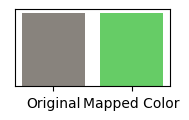

RGB: (114, 87, 83) -> Mapped Color: indigo


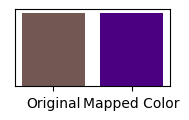

RGB: (63, 48, 44) -> Mapped Color: dark_indigo


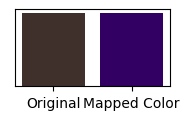

RGB: (218, 163, 142) -> Mapped Color: light_orange


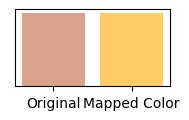

RGB: (168, 186, 204) -> Mapped Color: dark_violet


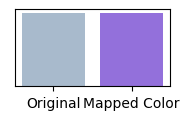

In [5]:
import random
from math import sqrt


def euclidean_distance(color1, color2):
    return sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(color1, color2)))


def map_to_rainbow_color(rgb):
    rainbow_colors = {
        'red': (255, 0, 0),
        'light_red': (255, 102, 102),
        'dark_red': (153, 0, 0),
        'orange': (255, 165, 0),
        'light_orange': (255, 204, 102),
        'dark_orange': (204, 102, 0),
        'yellow': (255, 255, 0),
        'light_yellow': (255, 255, 102),
        'dark_yellow': (204, 204, 0),
        'green': (0, 128, 0),
        'light_green': (102, 204, 102),
        'dark_green': (0, 102, 0),
        'blue': (0, 0, 255),
        'light_blue': (102, 102, 255),
        'dark_blue': (0, 0, 153),
        'indigo': (75, 0, 130),
        'light_indigo': (138, 43, 226),
        'dark_indigo': (49, 0, 98),
        'violet': (238, 130, 238),
        'light_violet': (255, 187, 255),
        'dark_violet': (147, 112, 219),
        'black': (0, 0, 0),
        'white': (255, 255, 255)
        
    }
    closest_color = min(rainbow_colors, key=lambda color: euclidean_distance(rgb, rainbow_colors[color]))
    return closest_color, rainbow_colors[closest_color]


def plot_colors(color1, color2):
    plt.figure(figsize=(2, 1))
    plt.bar([0, 1], [1, 1], color=[tuple(c/255 for c in color1), tuple(c/255 for c in color2)])
    plt.xticks([0, 1], ["Original", "Mapped Color"])
    plt.yticks([])
    plt.show()

for color in palette:
    rgb = color.rgb
    mapped_color, mapped_rgb = map_to_rainbow_color(rgb)
    print(f"RGB: {rgb} -> Mapped Color: {mapped_color}")
    plot_colors(rgb, mapped_rgb)

### webcolors

In [8]:
!pip install -q --upgrade webcolors

In [12]:
from scipy.spatial import KDTree
from webcolors import (
    css3_hex_to_names,
    # CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

In [13]:
print(convert_rgb_to_names((135, 129, 123)))

closest match: grey


#### Plot all colors

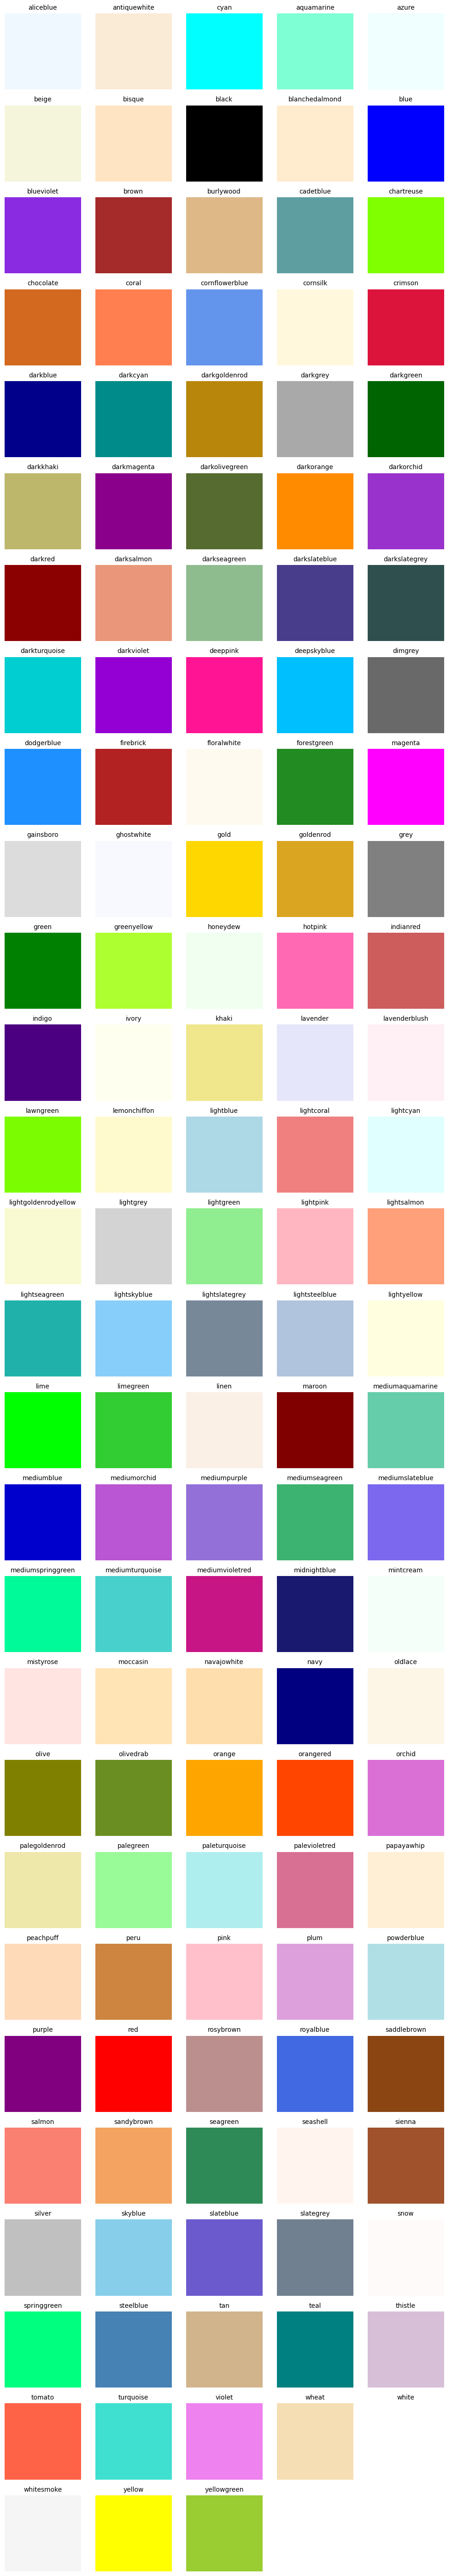

In [14]:
def hex_to_rgb(hex_color):
    return tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))

colors = [hex_to_rgb(hex_color) for hex_color in css3_hex_to_names.keys()]
num_colors = len(colors)
num_rows = (num_colors + 4) // 5  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 5, figsize=(10, num_rows * 2))

for i, (color, name) in enumerate(zip(colors, css3_hex_to_names.values())):
    row = i // 5
    col = i % 5
    axes[row, col].imshow([[color]])
    axes[row, col].set_title(name, fontsize=10)
    axes[row, col].axis('off')

# Hide any unused subplots
for i in range(num_colors, num_rows * 5):
    row = i // 5
    col = i % 5
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()